<a href="https://colab.research.google.com/github/joseantonioneto/ADS0010/blob/main/C%C3%B3pia_de_Classifica%C3%A7%C3%A3o_KNN_Cancer_de_Mama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Número de amostras e características: (569, 30)
Nomes das características: Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')
Nomes das classes: ['malignant' 'benign']


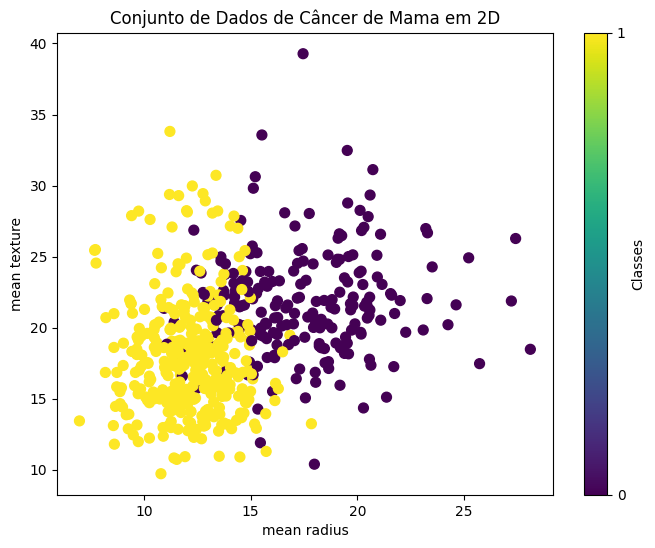

interactive(children=(IntSlider(value=180, description='angle1', max=360, step=10), IntSlider(value=180, descr…


Acurácia do modelo: 0.9473684210526315

Relatório de classificação:
              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        43
      benign       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



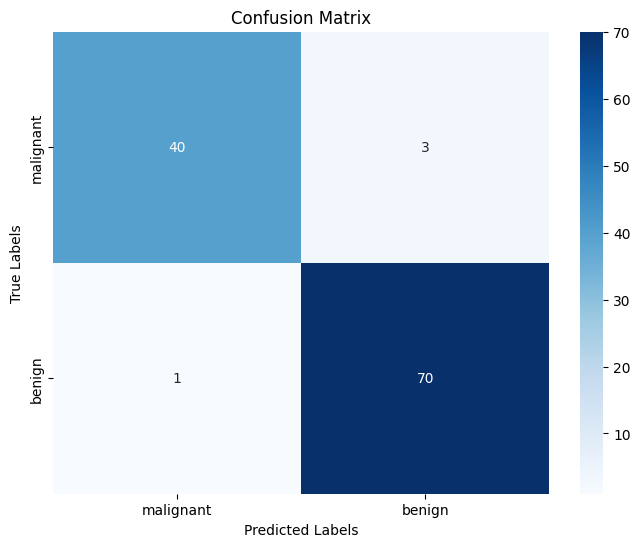

In [7]:
# Importar bibliotecas necessárias
import numpy as np  # Biblioteca para manipulação de arrays e funções matemáticas
import pandas as pd  # Biblioteca para manipulação e análise de dados em formato tabular
from sklearn.datasets import load_breast_cancer  # Função para carregar o conjunto de dados de câncer de mama do Wisconsin
from sklearn.model_selection import train_test_split  # Função para dividir os dados em conjuntos de treinamento e teste
from sklearn.preprocessing import StandardScaler  # Função para normalizar os dados
from sklearn.neighbors import KNeighborsClassifier  # Classe para o modelo KNN
from sklearn.metrics import accuracy_score, classification_report  # Funções para avaliar o modelo
import matplotlib.pyplot as plt  # Biblioteca para plotagem de gráficos
from mpl_toolkits.mplot3d import Axes3D  # Para plotagem 3D
from ipywidgets import interact  # Para criar widgets interativos
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


# Função para plotar o gráfico 3D com interatividade
def plot_3d_interactive(angle1, angle2):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    for i in range(len(np.unique(y))):
        ax.scatter(X[y == i].iloc[:, 0], X[y == i].iloc[:, 1], X[y == i].iloc[:, 2], label=breast_cancer.target_names[i])

    ax.set_xlabel(breast_cancer.feature_names[0])
    ax.set_ylabel(breast_cancer.feature_names[1])
    ax.set_zlabel(breast_cancer.feature_names[2])
    ax.set_title("Conjunto de Dados de Câncer de Mama em 3D")
    ax.view_init(angle1, angle2)  # Define o ângulo de visualização

    plt.legend(loc='best')
    plt.show()

# Carregar e entender o conjunto de dados de câncer de mama do Wisconsin
breast_cancer = load_breast_cancer()  # Carrega o conjunto de dados
X = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)  # Cria um DataFrame Pandas com os dados
y = breast_cancer.target  # Define os rótulos

# Exibir informações básicas sobre o conjunto de dados
print("Número de amostras e características:", X.shape)  # Mostra o número de amostras e características (colunas)
print("Nomes das características:", X.columns)  # Mostra os nomes das características
print("Nomes das classes:", breast_cancer.target_names)  # Mostra os nomes das classes

# Plotar os dados do conjunto de câncer de mama em 2D
plt.figure(figsize=(8, 6))  # Define o tamanho da figura
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='viridis', s=50)
plt.title("Conjunto de Dados de Câncer de Mama em 2D")
plt.xlabel(breast_cancer.feature_names[0])
plt.ylabel(breast_cancer.feature_names[1])
plt.colorbar(label='Classes', ticks=range(len(breast_cancer.target_names)))
plt.show()

# Plotar o gráfico 3D com interatividade
interact(plot_3d_interactive, angle1=(0, 360, 10), angle2=(0, 360, 10))

# Dividir os dados em conjuntos de treinamento e teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Divide os dados aleatoriamente em conjuntos de treinamento e teste

# Normalizar os dados (importante para o KNN)
scaler = StandardScaler()  # Inicializa o objeto de normalização
X_train_scaled = scaler.fit_transform(X_train)  # Normaliza os dados de treinamento
X_test_scaled = scaler.transform(X_test)  # Normaliza os dados de teste usando os parâmetros de treinamento

# Treinar o modelo KNN
k = 3  # Número de vizinhos
knn = KNeighborsClassifier(n_neighbors=k)  # Inicializa o modelo KNN com o número de vizinhos especificado

# Treinar o modelo
knn.fit(X_train_scaled, y_train)  # Treina o modelo KNN com os dados de treinamento normalizados

# Avaliar o modelo
y_pred = knn.predict(X_test_scaled)  # Faz previsões no conjunto de teste

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)  # Calcula a acurácia comparando as previsões com os rótulos verdadeiros

# Exibir a acurácia do modelo
print("\nAcurácia do modelo:", accuracy)

# Exibir o relatório de classificação
print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred, target_names=breast_cancer.target_names))  # Imprime um relatório detalhado com métricas de avaliação

data = load_breast_cancer()
X = data.data
y = data.target
target_names = data.target_names

model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
